<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

Data Science Cohort Live NYC July 2022
<p>Phase 4: Topic 40</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
    
%load_ext autoreload
%autoreload 2

#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

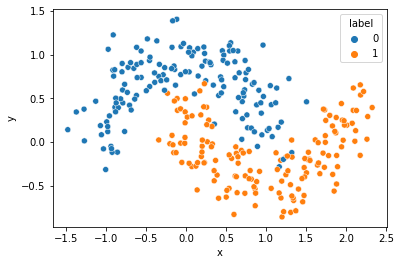

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

2022-11-15 12:01:45.127216: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 12:01:45.128281: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience).
- Terminate training.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [15]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Train on 192 samples, validate on 48 samples
Epoch 1/10000
192/192 [==============================] - 1s 5ms/sample - loss: 0.6446 - accuracy: 0.7917 - AUC: 0.9001 - val_loss: 0.6390 - val_accuracy: 0.8125 - val_AUC: 0.9563
Epoch 2/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.6268 - accuracy: 0.8385 - AUC: 0.9222 - val_loss: 0.6209 - val_accuracy: 0.7917 - val_AUC: 0.9357
Epoch 3/10000
192/192 [==============================] - 0s 184us/sample - loss: 0.6093 - accuracy: 0.8125 - AUC: 0.9324 - val_loss: 0.6044 - val_accuracy: 0.7917 - val_AUC: 0.9313
Epoch 4/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.5936 - accuracy: 0.8073 - AUC: 0.9306 - val_loss: 0.5885 - val_accuracy: 0.7708 - val_AUC: 0.9295
Epoch 5/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.5774 - accuracy: 0.8073 - AUC: 0.9273 - val_loss: 0.5735 - val_accuracy: 0.7708 - val_AUC: 0.9286
Epoch 6/10000
192/192 [=============================

Epoch 46/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.3143 - accuracy: 0.8698 - AUC: 0.9460 - val_loss: 0.3326 - val_accuracy: 0.8125 - val_AUC: 0.9554
Epoch 47/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.3132 - accuracy: 0.8698 - AUC: 0.9459 - val_loss: 0.3298 - val_accuracy: 0.8125 - val_AUC: 0.9545
Epoch 48/10000
192/192 [==============================] - 0s 188us/sample - loss: 0.3119 - accuracy: 0.8698 - AUC: 0.9468 - val_loss: 0.3279 - val_accuracy: 0.8125 - val_AUC: 0.9554
Epoch 49/10000
192/192 [==============================] - 0s 194us/sample - loss: 0.3108 - accuracy: 0.8698 - AUC: 0.9473 - val_loss: 0.3256 - val_accuracy: 0.8125 - val_AUC: 0.9562
Epoch 50/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.3098 - accuracy: 0.8698 - AUC: 0.9477 - val_loss: 0.3236 - val_accuracy: 0.8125 - val_AUC: 0.9563
Epoch 51/10000
192/192 [==============================] - 0s 191us/sample - loss: 0.3088 -

192/192 [==============================] - 0s 175us/sample - loss: 0.2861 - accuracy: 0.8750 - AUC: 0.9542 - val_loss: 0.2750 - val_accuracy: 0.8750 - val_AUC: 0.9741
Epoch 92/10000
192/192 [==============================] - 0s 188us/sample - loss: 0.2858 - accuracy: 0.8750 - AUC: 0.9541 - val_loss: 0.2739 - val_accuracy: 0.8750 - val_AUC: 0.9732
Epoch 93/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.2855 - accuracy: 0.8750 - AUC: 0.9543 - val_loss: 0.2740 - val_accuracy: 0.8750 - val_AUC: 0.9741
Epoch 94/10000
192/192 [==============================] - 0s 184us/sample - loss: 0.2853 - accuracy: 0.8698 - AUC: 0.9542 - val_loss: 0.2718 - val_accuracy: 0.8750 - val_AUC: 0.9741
Epoch 95/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.2847 - accuracy: 0.8750 - AUC: 0.9544 - val_loss: 0.2708 - val_accuracy: 0.8750 - val_AUC: 0.9732
Epoch 96/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.2843 - accuracy: 0.87

Epoch 136/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.2732 - accuracy: 0.8802 - AUC: 0.9563 - val_loss: 0.2466 - val_accuracy: 0.8750 - val_AUC: 0.9786
Epoch 137/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.2731 - accuracy: 0.8802 - AUC: 0.9561 - val_loss: 0.2468 - val_accuracy: 0.8750 - val_AUC: 0.9786
Epoch 138/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.2726 - accuracy: 0.8802 - AUC: 0.9563 - val_loss: 0.2467 - val_accuracy: 0.8750 - val_AUC: 0.9786
Epoch 139/10000
192/192 [==============================] - 0s 186us/sample - loss: 0.2724 - accuracy: 0.8802 - AUC: 0.9563 - val_loss: 0.2461 - val_accuracy: 0.8750 - val_AUC: 0.9786
Epoch 140/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.2720 - accuracy: 0.8802 - AUC: 0.9563 - val_loss: 0.2460 - val_accuracy: 0.8750 - val_AUC: 0.9786
Epoch 141/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.

Epoch 181/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.2535 - accuracy: 0.8750 - AUC: 0.9626 - val_loss: 0.2204 - val_accuracy: 0.9167 - val_AUC: 0.9821
Epoch 182/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.2529 - accuracy: 0.8750 - AUC: 0.9629 - val_loss: 0.2192 - val_accuracy: 0.9167 - val_AUC: 0.9821
Epoch 183/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.2522 - accuracy: 0.8750 - AUC: 0.9630 - val_loss: 0.2193 - val_accuracy: 0.9167 - val_AUC: 0.9821
Epoch 184/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.2518 - accuracy: 0.8750 - AUC: 0.9630 - val_loss: 0.2186 - val_accuracy: 0.9167 - val_AUC: 0.9821
Epoch 185/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.2512 - accuracy: 0.8750 - AUC: 0.9632 - val_loss: 0.2185 - val_accuracy: 0.9167 - val_AUC: 0.9821
Epoch 186/10000
192/192 [==============================] - 0s 184us/sample - loss: 0.

Epoch 226/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.2289 - accuracy: 0.8802 - AUC: 0.9695 - val_loss: 0.1973 - val_accuracy: 0.9375 - val_AUC: 0.9857
Epoch 227/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.2282 - accuracy: 0.8802 - AUC: 0.9698 - val_loss: 0.1963 - val_accuracy: 0.9375 - val_AUC: 0.9857
Epoch 228/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.2277 - accuracy: 0.8802 - AUC: 0.9699 - val_loss: 0.1956 - val_accuracy: 0.9375 - val_AUC: 0.9857
Epoch 229/10000
192/192 [==============================] - 0s 188us/sample - loss: 0.2272 - accuracy: 0.8854 - AUC: 0.9700 - val_loss: 0.1957 - val_accuracy: 0.9375 - val_AUC: 0.9857
Epoch 230/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.2263 - accuracy: 0.8802 - AUC: 0.9702 - val_loss: 0.1948 - val_accuracy: 0.9375 - val_AUC: 0.9857
Epoch 231/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.

Epoch 271/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.2025 - accuracy: 0.8958 - AUC: 0.9769 - val_loss: 0.1755 - val_accuracy: 0.9583 - val_AUC: 0.9911
Epoch 272/10000
192/192 [==============================] - 0s 184us/sample - loss: 0.2019 - accuracy: 0.8958 - AUC: 0.9770 - val_loss: 0.1751 - val_accuracy: 0.9583 - val_AUC: 0.9911
Epoch 273/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.2016 - accuracy: 0.8958 - AUC: 0.9771 - val_loss: 0.1740 - val_accuracy: 0.9583 - val_AUC: 0.9911
Epoch 274/10000
192/192 [==============================] - 0s 186us/sample - loss: 0.2009 - accuracy: 0.8958 - AUC: 0.9774 - val_loss: 0.1733 - val_accuracy: 0.9583 - val_AUC: 0.9911
Epoch 275/10000
192/192 [==============================] - 0s 187us/sample - loss: 0.2004 - accuracy: 0.8958 - AUC: 0.9775 - val_loss: 0.1726 - val_accuracy: 0.9583 - val_AUC: 0.9911
Epoch 276/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.

Epoch 316/10000
192/192 [==============================] - 0s 177us/sample - loss: 0.1778 - accuracy: 0.9271 - AUC: 0.9836 - val_loss: 0.1572 - val_accuracy: 0.9792 - val_AUC: 0.9929
Epoch 317/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.1774 - accuracy: 0.9271 - AUC: 0.9836 - val_loss: 0.1564 - val_accuracy: 0.9792 - val_AUC: 0.9929
Epoch 318/10000
192/192 [==============================] - 0s 168us/sample - loss: 0.1768 - accuracy: 0.9271 - AUC: 0.9840 - val_loss: 0.1565 - val_accuracy: 0.9792 - val_AUC: 0.9929
Epoch 319/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.1766 - accuracy: 0.9271 - AUC: 0.9841 - val_loss: 0.1552 - val_accuracy: 0.9792 - val_AUC: 0.9929
Epoch 320/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.1760 - accuracy: 0.9323 - AUC: 0.9843 - val_loss: 0.1560 - val_accuracy: 0.9792 - val_AUC: 0.9929
Epoch 321/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.

Epoch 361/10000
192/192 [==============================] - 0s 177us/sample - loss: 0.1558 - accuracy: 0.9479 - AUC: 0.9887 - val_loss: 0.1412 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 362/10000
192/192 [==============================] - 0s 171us/sample - loss: 0.1553 - accuracy: 0.9479 - AUC: 0.9889 - val_loss: 0.1409 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 363/10000
192/192 [==============================] - 0s 174us/sample - loss: 0.1550 - accuracy: 0.9479 - AUC: 0.9889 - val_loss: 0.1404 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 364/10000
192/192 [==============================] - 0s 177us/sample - loss: 0.1547 - accuracy: 0.9479 - AUC: 0.9891 - val_loss: 0.1404 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 365/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.1542 - accuracy: 0.9479 - AUC: 0.9892 - val_loss: 0.1398 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 366/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.

Epoch 406/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.1384 - accuracy: 0.9583 - AUC: 0.9912 - val_loss: 0.1287 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 407/10000
192/192 [==============================] - 0s 186us/sample - loss: 0.1380 - accuracy: 0.9583 - AUC: 0.9912 - val_loss: 0.1274 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 408/10000
192/192 [==============================] - 0s 184us/sample - loss: 0.1375 - accuracy: 0.9583 - AUC: 0.9914 - val_loss: 0.1274 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 409/10000
192/192 [==============================] - 0s 186us/sample - loss: 0.1372 - accuracy: 0.9583 - AUC: 0.9914 - val_loss: 0.1276 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 410/10000
192/192 [==============================] - 0s 187us/sample - loss: 0.1367 - accuracy: 0.9583 - AUC: 0.9915 - val_loss: 0.1268 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 411/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.

Epoch 451/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.1243 - accuracy: 0.9583 - AUC: 0.9937 - val_loss: 0.1183 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 452/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.1244 - accuracy: 0.9583 - AUC: 0.9935 - val_loss: 0.1170 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 453/10000
192/192 [==============================] - 0s 174us/sample - loss: 0.1239 - accuracy: 0.9583 - AUC: 0.9936 - val_loss: 0.1168 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 454/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.1236 - accuracy: 0.9583 - AUC: 0.9936 - val_loss: 0.1166 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 455/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.1234 - accuracy: 0.9583 - AUC: 0.9937 - val_loss: 0.1175 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 456/10000
192/192 [==============================] - 0s 177us/sample - loss: 0.

Epoch 496/10000
192/192 [==============================] - 0s 169us/sample - loss: 0.1136 - accuracy: 0.9635 - AUC: 0.9947 - val_loss: 0.1092 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 497/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.1131 - accuracy: 0.9583 - AUC: 0.9948 - val_loss: 0.1099 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 498/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.1129 - accuracy: 0.9583 - AUC: 0.9949 - val_loss: 0.1104 - val_accuracy: 0.9792 - val_AUC: 0.9955
Epoch 499/10000
192/192 [==============================] - 0s 171us/sample - loss: 0.1127 - accuracy: 0.9583 - AUC: 0.9949 - val_loss: 0.1097 - val_accuracy: 0.9792 - val_AUC: 0.9946
Epoch 500/10000
192/192 [==============================] - 0s 177us/sample - loss: 0.1123 - accuracy: 0.9583 - AUC: 0.9950 - val_loss: 0.1098 - val_accuracy: 0.9792 - val_AUC: 0.9955
Epoch 501/10000
192/192 [==============================] - 0s 171us/sample - loss: 0.

Epoch 541/10000
192/192 [==============================] - 0s 186us/sample - loss: 0.1044 - accuracy: 0.9635 - AUC: 0.9955 - val_loss: 0.1050 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 542/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.1042 - accuracy: 0.9635 - AUC: 0.9956 - val_loss: 0.1050 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 543/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.1042 - accuracy: 0.9635 - AUC: 0.9956 - val_loss: 0.1047 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 544/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.1039 - accuracy: 0.9635 - AUC: 0.9956 - val_loss: 0.1050 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 545/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.1038 - accuracy: 0.9635 - AUC: 0.9957 - val_loss: 0.1043 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 546/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.

Epoch 586/10000
192/192 [==============================] - 0s 187us/sample - loss: 0.0973 - accuracy: 0.9635 - AUC: 0.9967 - val_loss: 0.1013 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 587/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.0971 - accuracy: 0.9635 - AUC: 0.9967 - val_loss: 0.1016 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 588/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.0973 - accuracy: 0.9635 - AUC: 0.9966 - val_loss: 0.1006 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 589/10000
192/192 [==============================] - 0s 187us/sample - loss: 0.0971 - accuracy: 0.9688 - AUC: 0.9966 - val_loss: 0.1001 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 590/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0968 - accuracy: 0.9635 - AUC: 0.9966 - val_loss: 0.1009 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 591/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.

Epoch 631/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.0915 - accuracy: 0.9635 - AUC: 0.9974 - val_loss: 0.0980 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 632/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0912 - accuracy: 0.9635 - AUC: 0.9974 - val_loss: 0.0982 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 633/10000
192/192 [==============================] - 0s 177us/sample - loss: 0.0911 - accuracy: 0.9635 - AUC: 0.9975 - val_loss: 0.0981 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 634/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0911 - accuracy: 0.9635 - AUC: 0.9975 - val_loss: 0.0986 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 635/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.0908 - accuracy: 0.9635 - AUC: 0.9975 - val_loss: 0.0984 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 636/10000
192/192 [==============================] - 0s 174us/sample - loss: 0.

Epoch 676/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0865 - accuracy: 0.9635 - AUC: 0.9977 - val_loss: 0.0967 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 677/10000
192/192 [==============================] - 0s 166us/sample - loss: 0.0862 - accuracy: 0.9635 - AUC: 0.9977 - val_loss: 0.0969 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 678/10000
192/192 [==============================] - 0s 167us/sample - loss: 0.0861 - accuracy: 0.9635 - AUC: 0.9977 - val_loss: 0.0967 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 679/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0859 - accuracy: 0.9635 - AUC: 0.9977 - val_loss: 0.0963 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 680/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.0858 - accuracy: 0.9635 - AUC: 0.9977 - val_loss: 0.0962 - val_accuracy: 0.9792 - val_AUC: 0.9964
Epoch 681/10000
192/192 [==============================] - 0s 172us/sample - loss: 0.

Epoch 721/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.0822 - accuracy: 0.9635 - AUC: 0.9977 - val_loss: 0.0952 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 722/10000
192/192 [==============================] - 0s 172us/sample - loss: 0.0824 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0959 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 723/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.0821 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0951 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 724/10000
192/192 [==============================] - 0s 179us/sample - loss: 0.0818 - accuracy: 0.9688 - AUC: 0.9977 - val_loss: 0.0952 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 725/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.0817 - accuracy: 0.9688 - AUC: 0.9977 - val_loss: 0.0950 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 726/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.

Epoch 766/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.0790 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0954 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 767/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.0785 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0952 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 768/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.0785 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0947 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 769/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.0784 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0942 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 770/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.0785 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0946 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 771/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.

Epoch 811/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0758 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0945 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 812/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.0757 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0946 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 813/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0756 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0946 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 814/10000
192/192 [==============================] - 0s 171us/sample - loss: 0.0756 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0944 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 815/10000
192/192 [==============================] - 0s 182us/sample - loss: 0.0755 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0950 - val_accuracy: 0.9583 - val_AUC: 0.9964
Epoch 816/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.

Epoch 856/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.0730 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0961 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 857/10000
192/192 [==============================] - 0s 169us/sample - loss: 0.0732 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0956 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 858/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0729 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0954 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 859/10000
192/192 [==============================] - 0s 174us/sample - loss: 0.0731 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0962 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 860/10000
192/192 [==============================] - 0s 174us/sample - loss: 0.0727 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0962 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 861/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.

Epoch 901/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.0706 - accuracy: 0.9688 - AUC: 0.9977 - val_loss: 0.0954 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 902/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0705 - accuracy: 0.9688 - AUC: 0.9977 - val_loss: 0.0950 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 903/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.0704 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0954 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 904/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0704 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0956 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 905/10000
192/192 [==============================] - 0s 187us/sample - loss: 0.0703 - accuracy: 0.9688 - AUC: 0.9978 - val_loss: 0.0955 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 906/10000
192/192 [==============================] - 0s 185us/sample - loss: 0.

Epoch 946/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.0686 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0952 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 947/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0685 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0949 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 948/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.0686 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0942 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 949/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0683 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0942 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 950/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0682 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0947 - val_accuracy: 0.9583 - val_AUC: 0.9946
Epoch 951/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.

Epoch 991/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.0668 - accuracy: 0.9688 - AUC: 0.9980 - val_loss: 0.0968 - val_accuracy: 0.9583 - val_AUC: 0.9937
Epoch 992/10000
192/192 [==============================] - 0s 178us/sample - loss: 0.0669 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0960 - val_accuracy: 0.9583 - val_AUC: 0.9937
Epoch 993/10000
192/192 [==============================] - 0s 180us/sample - loss: 0.0667 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0959 - val_accuracy: 0.9583 - val_AUC: 0.9937
Epoch 994/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.0667 - accuracy: 0.9688 - AUC: 0.9979 - val_loss: 0.0957 - val_accuracy: 0.9583 - val_AUC: 0.9937
Epoch 995/10000
192/192 [==============================] - 0s 176us/sample - loss: 0.0666 - accuracy: 0.9688 - AUC: 0.9980 - val_loss: 0.0967 - val_accuracy: 0.9583 - val_AUC: 0.9929
Epoch 996/10000
192/192 [==============================] - 0s 183us/sample - loss: 0.

192/192 [==============================] - 0s 173us/sample - loss: 0.0640 - accuracy: 0.9688 - AUC: 0.9981 - val_loss: 0.0983 - val_accuracy: 0.9583 - val_AUC: 0.9929
Epoch 1080/10000
192/192 [==============================] - 0s 175us/sample - loss: 0.0640 - accuracy: 0.9688 - AUC: 0.9981 - val_loss: 0.0984 - val_accuracy: 0.9583 - val_AUC: 0.9929
Epoch 1081/10000
192/192 [==============================] - 0s 172us/sample - loss: 0.0639 - accuracy: 0.9688 - AUC: 0.9981 - val_loss: 0.0990 - val_accuracy: 0.9583 - val_AUC: 0.9929
Epoch 1082/10000
192/192 [==============================] - 0s 181us/sample - loss: 0.0640 - accuracy: 0.9688 - AUC: 0.9981 - val_loss: 0.0994 - val_accuracy: 0.9583 - val_AUC: 0.9929
Epoch 1083/10000
192/192 [==============================] - 0s 174us/sample - loss: 0.0642 - accuracy: 0.9688 - AUC: 0.9980 - val_loss: 0.0986 - val_accuracy: 0.9583 - val_AUC: 0.9929
Epoch 1084/10000
192/192 [==============================] - 0s 173us/sample - loss: 0.0639 - accu

In [16]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

array([[9.9994880e-01],
       [9.9610376e-01],
       [9.7924912e-01],
       [9.9864244e-01],
       [2.9802322e-08]], dtype=float32)

In [17]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [18]:
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.96666664 0.9988776


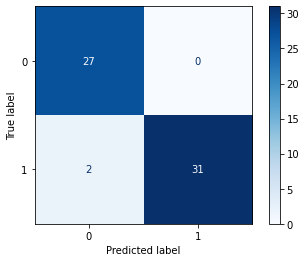

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

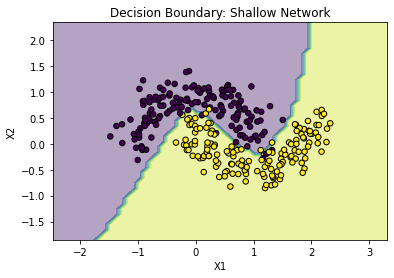

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [21]:
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,AUC,val_loss,val_accuracy,val_AUC
epochs,,,,,,
0,0.644556,0.791667,0.900131,0.638962,0.812500,0.956250
1,0.626847,0.838542,0.922221,0.620935,0.791667,0.935714
2,0.609294,0.812500,0.932421,0.604377,0.791667,0.931250
3,0.593603,0.807292,0.930566,0.588462,0.770833,0.929464
4,0.577374,0.807292,0.927348,0.573525,0.770833,0.928571


Plotting history:

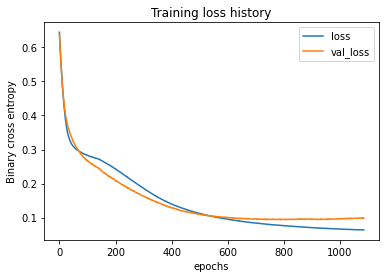

In [22]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

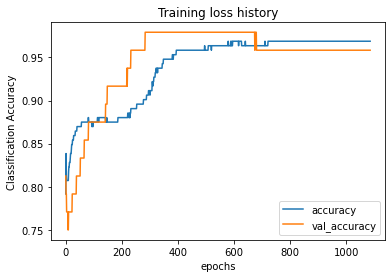

In [23]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [24]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [25]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

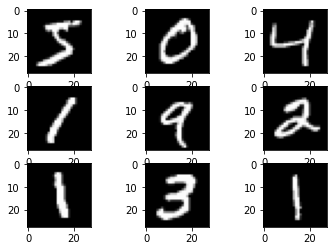

In [26]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [27]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [28]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [29]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [30]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [31]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 10s 215us/sample - loss: 0.5014 - accuracy: 0.8531 - val_loss: 0.2457 - val_accuracy: 0.9337
Epoch 2/100
48000/48000 [==============================] - 6s 121us/sample - loss: 0.2224 - accuracy: 0.9367 - val_loss: 0.1924 - val_accuracy: 0.9473
Epoch 3/100
48000/48000 [==============================] - 6s 120us/sample - loss: 0.1749 - accuracy: 0.9489 - val_loss: 0.1653 - val_accuracy: 0.9525
Epoch 4/100
48000/48000 [==============================] - 6s 116us/sample - loss: 0.1437 - accuracy: 0.9589 - val_loss: 0.1560 - val_accuracy: 0.9548
Epoch 5/100
48000/48000 [==============================] - 6s 119us/sample - loss: 0.1268 - accuracy: 0.9621 - val_loss: 0.1504 - val_accuracy: 0.9577
Epoch 6/100
48000/48000 [==============================] - 5s 107us/sample - loss: 0.1109 - accuracy: 0.9676 - val_loss: 0.1451 - val_accuracy: 0.9593
Epoch 7/100
48000/48000 [==================

In [32]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[1.2271904e-32, 5.9997984e-23, 1.1970585e-18, ..., 1.0000000e+00,
        7.2772861e-15, 1.1985893e-13],
       [2.9645164e-13, 1.8066207e-19, 1.0000000e+00, ..., 0.0000000e+00,
        3.7770794e-24, 0.0000000e+00],
       [3.9757204e-21, 1.0000000e+00, 2.4676556e-09, ..., 1.4597832e-14,
        2.5462651e-08, 2.6723943e-25],
       ...,
       [9.0450450e-35, 3.2743549e-22, 7.7258364e-27, ..., 9.8435651e-18,
        6.6912253e-12, 3.1127265e-09],
       [7.8631832e-32, 1.0953611e-29, 0.0000000e+00, ..., 4.0155069e-26,
        8.3119476e-13, 5.9920751e-33],
       [1.5021085e-18, 1.8041571e-23, 1.2774300e-27, ..., 0.0000000e+00,
        1.9621265e-36, 0.0000000e+00]], dtype=float32)

In [33]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.28072045716204186, 0.9612]

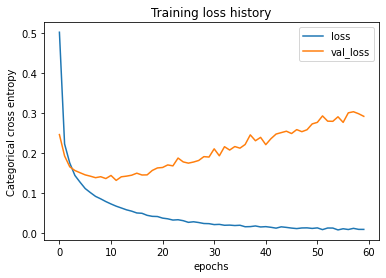

In [34]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

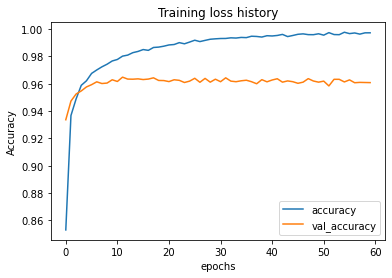

In [35]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [36]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

Let's look at our classifier did on the test set in more detail.

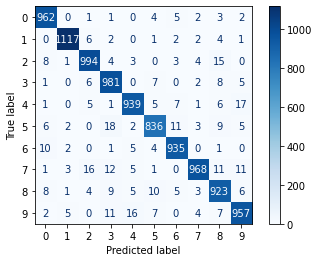

In [37]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>